In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import random
from scipy.stats import poisson
import scipy as sc

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_lenovo = pd.read_csv(r'C:\Users\gst8882\Desktop\DSC541\lenovo.csv')

df_lenovo2 = pd.read_csv(r'C:\Users\gst8882\Desktop\DSC541\new2_lenovo.csv')
df_lenovo2.head()

,Plant,item_Number,Date,Quantity,FG_new,FGShared
0,1001,SSW0L47695,21AUG1960,2,1,4
1,1001,000000000031045653,21AUG1960,1,1,.
2,1001,SSW0G44351,21AUG1960,1,1,.
3,1001,SSW0K51574,21AUG1960,1,1,.
4,1001,000000000031042062,21AUG1960,1,1,.


In [3]:
df_lenovo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
Plant          155 non-null int64
item_Number    155 non-null object
Date           155 non-null object
Quantity       155 non-null int64
FG_new         155 non-null int64
FGShared       155 non-null object
dtypes: int64(3), object(3)
memory usage: 7.3+ KB


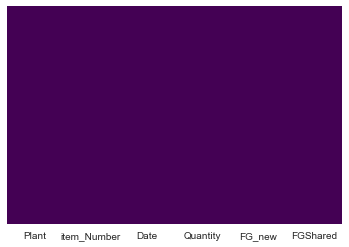

In [4]:
sns.heatmap(df_lenovo2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

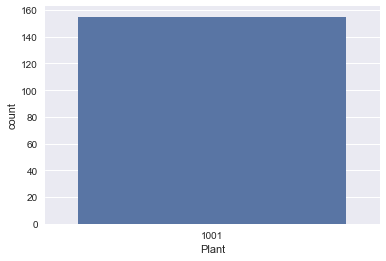

In [4]:
sns.countplot(x='Plant', data=df_lenovo)
# one plant 

c:\Anaconda3)\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


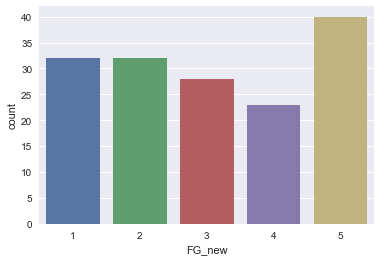

In [4]:
sns.countplot(x='FG_new', data=df_lenovo2)
# 2 Finished goods

c:\Anaconda3)\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


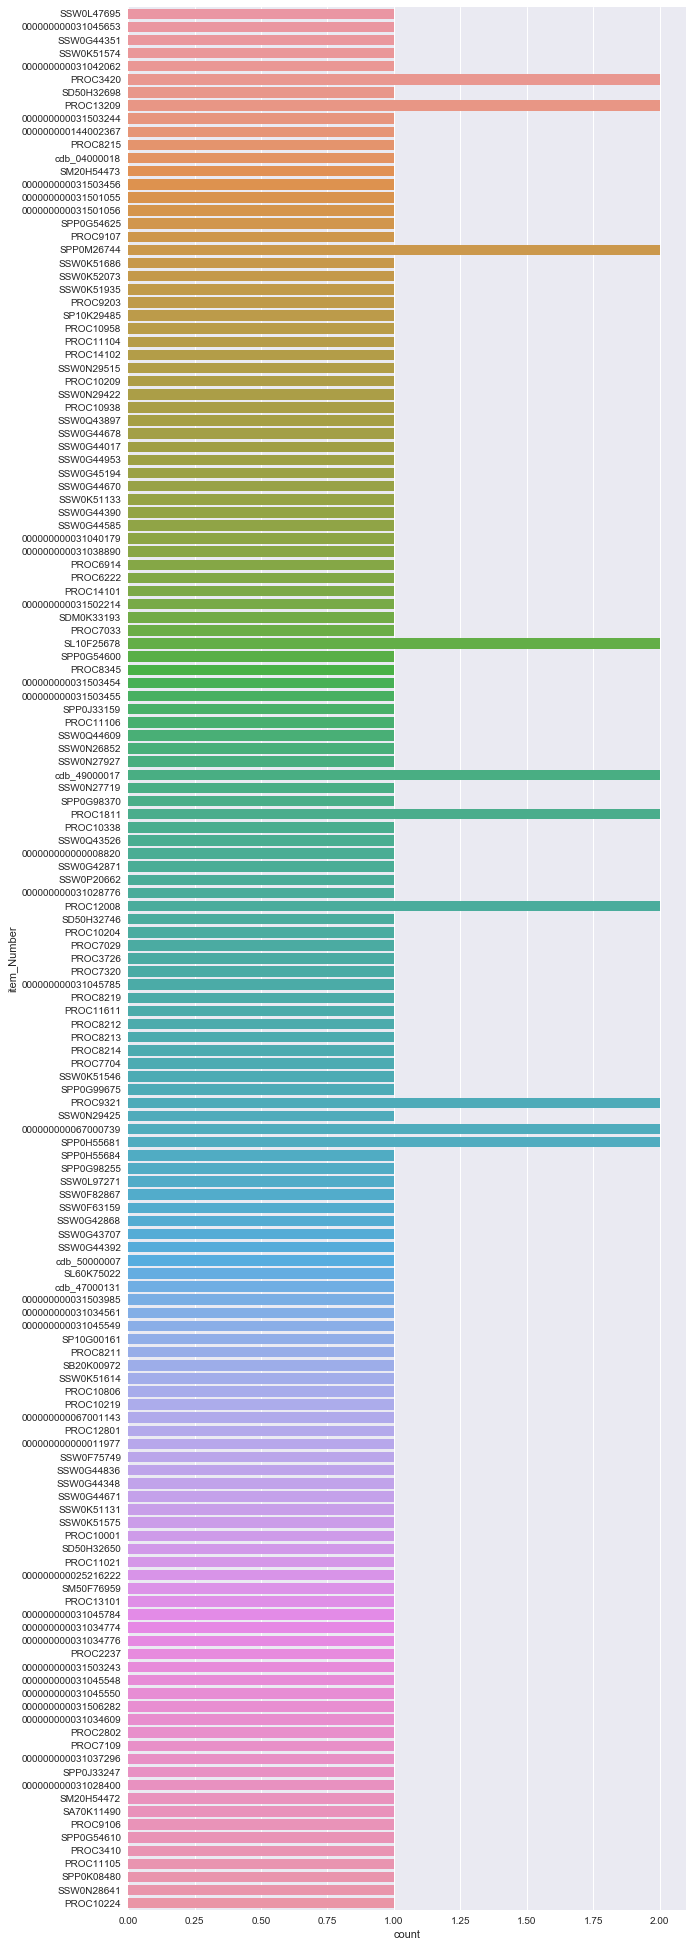

In [5]:
plt.subplots(figsize=(10,35));
sns.countplot( y='item_Number',  data=df_lenovo2);


In [6]:
#Check them out
df_lenovo2['item_Number'].value_counts()

cdb_49000017          2
PROC9321              2
PROC3420              2
SPP0M26744            2
PROC12008             2
SPP0H55681            2
000000000067000739    2
PROC13209             2
SL10F25678            2
PROC1811              2
PROC10958             1
000000000031501055    1
SSW0G44953            1
PROC8211              1
000000000031045548    1
000000000000008820    1
000000000031038890    1
SSW0L47695            1
PROC6914              1
PROC11105             1
SM50F76959            1
SPP0G54610            1
PROC10204             1
SSW0G44392            1
SSW0L97271            1
PROC10338             1
cdb_50000007          1
SSW0G44670            1
000000000031503244    1
PROC10001             1
                     ..
PROC10224             1
SPP0G98370            1
PROC3726              1
SSW0G44836            1
PROC3410              1
000000000031045550    1
SA70K11490            1
000000000031034561    1
SSW0P20662            1
SSW0Q43897            1
PROC7033        

# Done with data exploration ! Gotta make some simulation data to model.

# Simulate orders

In [28]:
#O1 = 10
#O2 = 20
#O3 = 30
# DONT DO THIS !!!
lst = [[random.randrange(1,6,1) for _ in range(random.randrange(1,51,1))] for __ in range(1,21)]
print(len(lst))
#print(lst)
print(lst[0])
print(lst[1])
print(lst[2])
print(lst[3])
print(lst[4])
print(lst[5])
print(lst[6])

20
[4, 5, 5, 2, 4, 1, 3, 1, 2, 5, 2, 1, 3, 4, 4, 3, 5, 1, 4, 4, 4, 3, 1, 4, 5, 2, 5, 2, 2, 2, 3]
[2, 2, 5, 1, 4, 5, 3, 5, 3, 3, 1, 4, 3, 1]
[2, 4, 3, 2, 5, 3, 2, 1, 5, 3, 4, 5, 1, 5, 3, 1, 3, 5, 3, 1, 3, 5, 1, 3, 4, 5, 4, 2, 2, 4, 5, 4, 5, 1, 4, 3, 4, 2, 5, 1, 4, 3, 1, 3, 2, 2, 3, 2]
[2, 2, 4, 2, 4, 5, 1, 2, 3, 4, 3, 5, 2, 1, 4]
[3, 3, 5, 3, 3, 1, 2, 3, 4, 4, 5, 5, 5, 4, 1, 4, 5, 5, 2, 5, 4, 3, 5, 5, 1, 1, 3, 4]
[5, 3, 5, 3, 1, 1, 1, 2, 4, 5, 4, 4, 4, 5, 3, 3, 1, 4, 5, 4, 4, 3, 1, 2, 5, 1, 4, 1, 1, 5, 2, 1, 1, 2, 1, 1, 4]
[5, 3, 2, 4, 4, 2, 1, 3, 5, 2, 2, 5, 4, 3, 3, 3, 4, 4, 4, 1, 4, 1, 4, 5, 4, 2, 1, 5, 3, 1, 5, 5]


## ^ don't do that !  products in each order should be homogeneous

# Create order Numbers... 1-100

In [45]:
order_number = np.arange(1,101)
print(order_number)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


# Make a list of 100 random Finished Goods

In [46]:
FG = [random.randrange(1, 6, 1) for _ in range(100)]
print(FG)

[4, 5, 4, 3, 2, 1, 3, 4, 4, 5, 3, 2, 2, 2, 5, 2, 4, 2, 2, 4, 5, 1, 3, 5, 4, 4, 4, 5, 4, 2, 5, 2, 5, 1, 3, 5, 5, 1, 2, 4, 2, 2, 3, 1, 4, 3, 3, 1, 3, 5, 5, 3, 3, 2, 5, 2, 2, 1, 1, 4, 4, 1, 5, 5, 2, 4, 5, 5, 3, 2, 2, 5, 3, 1, 2, 3, 2, 4, 4, 3, 2, 3, 4, 3, 3, 4, 3, 3, 1, 3, 3, 3, 3, 3, 4, 2, 3, 5, 2, 2]


# The order size should be a  Poisson Distribution centered around 20

In [27]:
# not working yet 
#order_size = np.random.poisson(5,100)
order_size = poisson.rvs(mu=15, size=100, random_state=42)
print(order_size)

[18 10 16 19 11 13 14 16 12 14 11 16 16 13 17 10 12 13 15  9  6 14 19 12
 10 18 17 18 13 20 13 13 18 21 10 18 18 15 13 21 14 12 12 22 19 21 13 12
 14 10 23 15 25 15 12 16  7 21 10 17 12 13 17  9 13 17 15 17 17 22 13 12
 19 15 21 13 17 16  9 15 17 18 13 17  9 12 21 19 16 11 12 17 21 12 20 11
 22 16 10 20]


In [2]:
#fake = poisson.pmf(k=20, mu=.6)
#fake = poisson.std(mu=20, loc=0)
#fake = poisson.pmf(k=20, mu=.6)
#fake = poisson.rvs(mu=15, size=100, loc=20, random_state=1001)
#fake

x=np.arange(1,50)

for _ in range (100):
    fake =  poisson.std(mu=x, loc=0)
    print(fake)

[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766 3.31662479 3.46410162
 3.60555128 3.74165739 3.87298335 4.         4.12310563 4.24264069
 4.35889894 4.47213595 4.58257569 4.69041576 4.79583152 4.89897949
 5.         5.09901951 5.19615242 5.29150262 5.38516481 5.47722558
 5.56776436 5.65685425 5.74456265 5.83095189 5.91607978 6.
 6.08276253 6.164414   6.244998   6.32455532 6.40312424 6.4807407
 6.55743852 6.63324958 6.70820393 6.78232998 6.8556546  6.92820323
 7.        ]
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766 3.31662479 3.46410162
 3.60555128 3.74165739 3.87298335 4.         4.12310563 4.24264069
 4.35889894 4.47213595 4.58257569 4.69041576 4.79583152 4.89897949
 5.         5.09901951 5.19615242 5.29150262 5.38516481 5.47722558
 5.56776436 5.65685425 5.74456265 5.83095189 5.91607978 6.
 6.08276253 6.164414   6.244998   6.32455532 6.40312424 6.4807407


c:\Anaconda3)\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


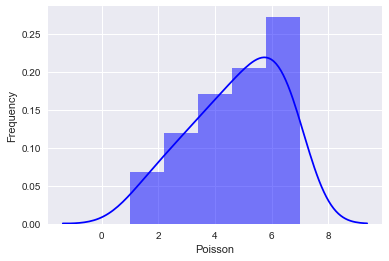

In [3]:

#fake = poisson.rvs(mu=2, size=100, random_state=1001)

ax = sns.distplot(fake,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth":25,'alpha':.5}
                 );
ax.set(xlabel='Poisson', ylabel='Frequency');

# Skew a Normal Dist... looks ok 

[0.00788612 0.03382494 0.05976376 0.08570258 0.1116414  0.13758022
 0.16351904 0.18945786 0.21539668 0.2413355  0.26727432 0.29321314
 0.31915196 0.34509078 0.3710296  0.39696842 0.42290724 0.44884606
 0.47478488 0.5007237  0.52666252 0.55260134 0.57854016 0.60447898
 0.6304178  0.65635662 0.68229544 0.70823426 0.73417308 0.7601119
 0.78605072 0.81198954 0.83792836 0.86386718 0.889806   0.91574482
 0.94168364 0.96762246 0.99356128 1.0195001  1.04543892 1.07137774
 1.09731656 1.12325538 1.1491942  1.17513302 1.20107184 1.22701066
 1.25294948 1.2788883  1.30482712 1.33076594 1.35670476 1.38264358
 1.4085824  1.43452122 1.46046004 1.48639886 1.51233768 1.5382765
 1.56421532 1.59015414 1.61609296 1.64203178 1.6679706  1.69390942
 1.71984824 1.74578706 1.77172588 1.7976647  1.82360352 1.84954234
 1.87548116 1.90141998 1.9273588  1.95329762 1.97923644 2.00517526
 2.03111408 2.0570529  2.08299172 2.10893054 2.13486936 2.16080818
 2.186747   2.21268582 2.23862464 2.26456346 2.29050228 2.316441

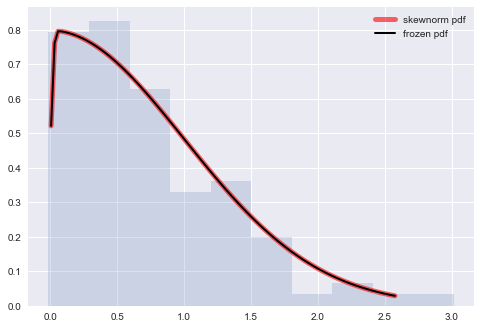

[ 1.45434148  0.6795275   0.9425207   1.20643752  1.34272074  0.54238723
 -0.0125963   1.68369141  0.85831431  0.35545462  0.73956624  0.75051356
  0.20373297  0.38742815  1.39592516  3.018094    0.09634538  1.27355615
  0.53572     0.70369634  0.98366627  0.7486989   0.43134992  0.42598075
  1.18874931  0.86063657  0.12183345  0.48729902  0.25430201  0.46913411
  0.30951705  0.96169176  1.52855343  0.914766    0.44299412  1.30407395
  1.24924919  1.91000761  1.08098017  0.33851579  0.07712111  0.54732103
  1.54050397  0.42510394  0.57591824  0.9712887   0.05712682  2.51774942
  1.31412215  1.0168262   0.46043044  0.18093164  1.51084929  0.67076425
  1.11645709  0.00444201  0.40495164  0.75043696  1.35349507  0.09985574
  1.44122905  0.17704279  0.26121587  1.68645288  0.31894796  0.28563189
  0.95015399  0.0304154   0.40614367  2.20827562  0.06077409  0.58013646
  0.16591944  0.18193464  0.63793955  0.28403129  0.06202555  1.61443737
  0.47269521  0.69290325  0.79010985  0.09553757  0

In [65]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:

a = 50
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

print(x)

#Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
#This returns a “frozen” RV object holding the given parameters fixed.
# prob dont need this ! 
#but here it is


#Freeze the distribution and display the frozen pdf:
rv = skewnorm(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Check accuracy of cdf and ppf:
vals = skewnorm.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], skewnorm.cdf(vals, a))
True

#Generate random numbers:
r = skewnorm.rvs(a, size=100)

#And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

print(r)


# Use the Poisson Dist PDF equation .  Maybe loop it. 

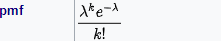

## So PMF = probability mass function so its only one value.  I need to use the PDF (Probability Density Function) version.  

In [49]:
lam = 5
k = 50 #np.arange(1,50)
p = ((lam^k)*np.exp(-lam)) / sc.special.factorial(k)
print(p)

1.2184715897721508e-65


In [92]:
np.exp(-.1)

0.9048374180359595

# Make fake order size... because I give up

In [43]:
Order_Size = [1,1,2,2,3,3,3,4,4,5,5,5,6,6,6,7,7,8,8,9,9,9,9,10,10,10,11,
             11,11,12,12,13,13,13,14,14,14,14,14,15,15,15,15,15,16,
             16,16,16,16,16,17,17,17,18,18,18,18,18,19,19,19,19,19,20,20,20,
             20,20,20,20,21,22,23,24,25,26,27,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
len(Order_Size)

100

c:\Anaconda3)\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


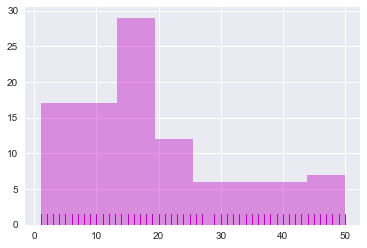

In [41]:
#plt.xticks([0,5,10,15,20,25,30,50])
sns.distplot(Order_Size, color="m", kde=False, rug=True);



# Song instructions ... do this! 

## This gives you a set of ramdom numbers with lambda as 2 (10000 samples)

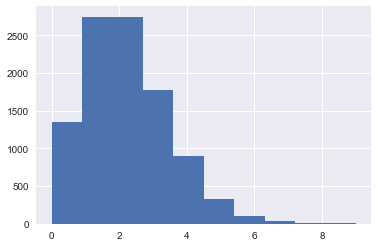

10000

In [4]:
import numpy as np
import scipy as sc
from scipy.stats import skewnorm
s = np.random.poisson(2, 10000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 10)
plt.show()
len(s)


## This gives you a set of random numbers with lambda as 50 (100 samples)


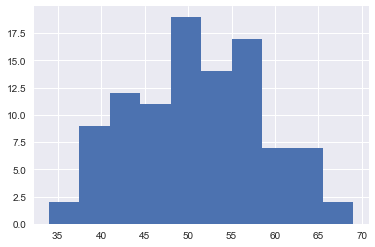

100

In [6]:

s_larger = np.random.poisson(50, 100)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s_larger, 10)
plt.show()
len(s_larger)

## You can combine the s and s_larger, use s as small orders and s_larger as orders from the big corporations. Then, if you do not need that many, you can do a sample of the combined s and s_larger.

In [51]:
bigS = [*s,*s_larger]
print("bigS = ",len(bigS))
bigS[:]=(value for value in bigS if value != 0)
#print(bigS)

Order_Size = []
for _ in range(100):
    rando_orders = (random.choice(bigS))
    Order_Size.append(rando_orders)
print("Order_Size = ",len(Order_Size))
print(Order_Size)

bigS =  10100
Order_Size =  100
[1, 8, 3, 2, 2, 1, 2, 3, 4, 2, 2, 2, 2, 1, 1, 4, 1, 3, 1, 4, 3, 2, 1, 4, 1, 2, 4, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 52, 2, 2, 2, 1, 1, 2, 3, 3, 2, 3, 3, 4, 1, 3, 2, 8, 2, 2, 2, 5, 5, 3, 3, 1, 2, 4, 2, 3, 4, 1, 2, 4, 1, 4, 3, 3, 2, 1, 2, 1, 1, 3, 6, 2, 3, 2, 6, 2, 3, 1, 6, 4, 3, 2, 2, 2, 5, 2, 4, 5]


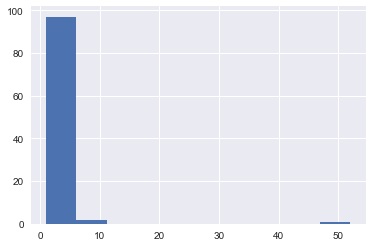

In [52]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(Order_Size, 10)
plt.show()


# Turn the 3 lists above into a Data Frame
## lists = Order Number, Finished Good, and Order Size

In [53]:
df_orders = pd.DataFrame({'Order Number':order_number, 'Finished Good':FG, 'Order Size':Order_Size})
df_orders

,Order Number,Finished Good,Order Size
0,1,4,1
1,2,5,8
2,3,4,3
3,4,3,2
4,5,2,2
5,6,1,1
6,7,3,2
7,8,4,3
8,9,4,4
9,10,5,2
